## Redes MPL no SKlearn

In [ ]:
# Apenas para filtrar warnings
import warnings
warnings.filterwarnings("ignore")

# Bibliotecas de DS
import pandas as pd
import seaborn as sns

# Separação de dados
from sklearn.model_selection import train_test_split

# Padronização de dados
from sklearn.preprocessing import StandardScaler

# Modelos a serem utilizados
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor

# Mertricas de avaliação
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, ConfusionMatrixDisplay

## Case 1: Classificação (Iris Dataset)

### Leitura do dataset

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data["class"] = iris.target

data

### Dividindo dados em Treino e Teste

In [ ]:
X = data.drop(columns=["class"]) # features
y = data["class"]                # label

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

### Padronização dos dados
#### Estes passos tbm servem quando forem usar o MinMaxScaler()!

In [ ]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

### Construção dos modelos
#### Perceptron  e MLP

In [ ]:
# Matriz  de confusão do perceptron
from sklearn.metrics import confusion_matrix

def matriz_confusao(teste_labels, teste_predicoes, classes):
  cm = confusion_matrix(teste_labels,
                        teste_predicoes,
                        labels=classes)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=classes)
  disp.plot(cmap="Blues")

def gera_modelos(xtr, xts, ytr, yts):

  # Perceprton
  p = Perceptron(random_state = 42)
  p.fit(xtr, ytr)

  y_pred = p.predict(xts)

  print(f"ACC Perceptron: {round(accuracy_score(y_pred, yts), 2)}")

  matriz_confusao(yts, y_pred, p.classes_)

  # MLP
  mlp = MLPClassifier(
      hidden_layer_sizes = (5,),
      random_state = 1,
      solver = "lbfgs"
  )
  mlp.fit(xtr, ytr)

  y_pred = mlp.predict(xts)

  print(f"ACC MLP: {round(accuracy_score(y_pred, yts), 2)}")
  matriz_confusao(yts, y_pred, mlp.classes_)


ACC Perceptron: 0.63
ACC MLP: 0.3


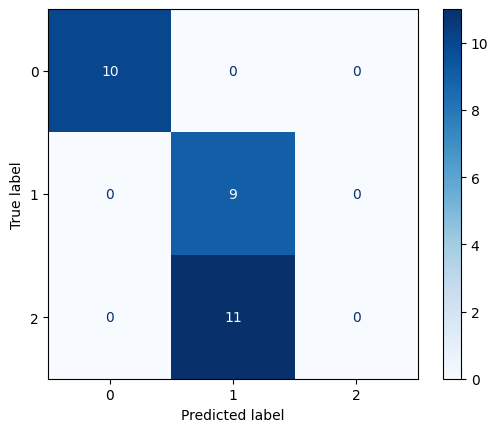

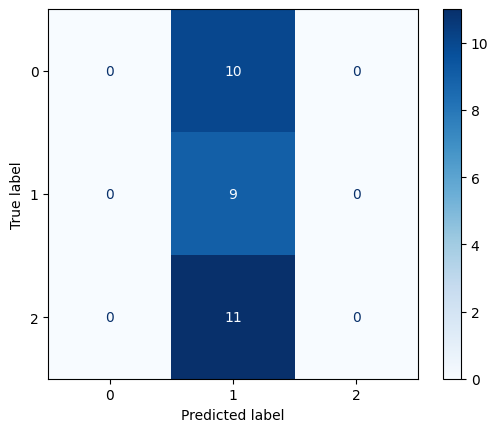

In [ ]:
# Gerar os resultados com os dados "brutos" (sem padronização)
gera_modelos(X_train, X_test, y_train, y_test)

ACC Perceptron: 0.93
ACC MLP: 0.9


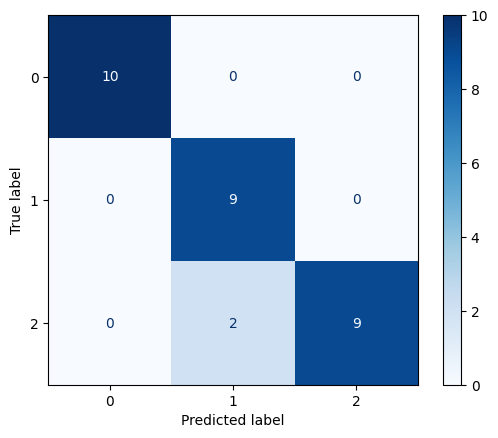

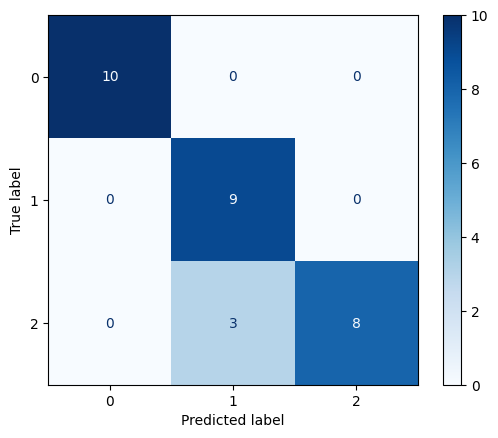

In [ ]:
# Gera os modelos com os dados PADRONIZADOS
gera_modelos(X_train_scaled, X_test_scaled, y_train, y_test)

## Case 2: Regressão (California house-prices dataset)

### Leitura do dataset e preparação do pandas

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data["label"] = housing.target

data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,label
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Divisão dos dados em Treino e Teste

In [ ]:
X = data.drop(columns=["label"])
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

### Padronização dos dados

In [ ]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

### Modelo de regressão

In [ ]:
def modelo_regressao(xtr, xts, ytr, yts):
  mlp = MLPRegressor(
      hidden_layer_sizes = (5,),
      random_state = 1,
      max_iter = 50
  )
  mlp.fit(xtr, ytr)

  y_pred = mlp.predict(xts)

  print(f"MSE: {round(mean_squared_error(y_pred, yts), 2)}")
  print(f"MSE: {round(mean_absolute_error(y_pred, yts), 2)}")

In [ ]:
# Dados originais
modelo_regressao(X_train, X_test, y_train, y_test)

MSE: 1.71
MSE: 0.68


In [ ]:
# Dados padronizados
modelo_regressao(X_train_ss, X_test_ss, y_train, y_test)

MSE: 0.46
MSE: 0.49


In [ ]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,label
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010
